In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import swan_vis as swan
from scipy import sparse
import pyranges.pyranges as pr
import pyranges as pyranges
import plotly.express as px
# %matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

# Find unique intron chains, TSSs, TESs in the annotation for detected genes

In [2]:
# # get list of detected polya genes
# df = pd.read_csv('../talon/human_talon_abundance.tsv', sep='\t')
# df, inds = get_tpm_table(df,
#                    how='gene',
#                    min_tpm=1,
#                    gene_subset='polya')

In [6]:
sg = swan.read('swan.p')
df, counts, regions = get_ic_tss_tes(sg,
                                     kind='annot', 
                                     subset=inds)

Read in graph from swan.p
206761
hewwo
176709


In [10]:
gene_df, _, _ = get_gtf_info(how='gene')
gene_df = gene_df[['gid', 'biotype_category']]
counts = counts.merge(gene_df, on='gid', how='left')

In [20]:
temp = counts[['intron_chain', 'biotype_category', 'gid']].groupby(['intron_chain', 'biotype_category']).count().reset_index()
temp.rename({'gid': 'n_genes'}, axis=1, inplace=True)
temp.sort_values(by='n_genes', inplace=True, ascending=False)

print(temp.loc[temp.biotype_category == 'protein_coding'].head())
print(temp.loc[temp.biotype_category == 'pseudogene'].head())


temp.to_csv('detected_polya_gencode_genes_by_biotype.tsv', sep='\t')

    intron_chain biotype_category  n_genes
1              1   protein_coding     2046
4              2   protein_coding     1715
7              3   protein_coding     1702
10             4   protein_coding     1551
13             5   protein_coding     1518
    intron_chain biotype_category  n_genes
2              1       pseudogene     2935
5              2       pseudogene      293
8              3       pseudogene      147
11             4       pseudogene      108
14             5       pseudogene       68


In [22]:
sg = swan.read('swan.p')
df, counts, regions = get_ic_tss_tes(sg,
                                     kind='annot', 
                                     subset='polya')

Read in graph from swan.p
206761
197392


How many polyA genes have only a single isoform in GENCODE?

In [ ]:
gene_df, _, _ = get_gtf_info(how='gene', subset='polya')
temp = counts.loc[counts.gid.isin(gene_df.gid.tolist())]

temp[['gid', 'intron_chain']].groupby('intron_chain').count().head()

,gid
intron_chain,
1,27262
2,4467
3,2832
4,2132
5,1867


How many psuedogenes have a single intron chain in GENCODE?

In [9]:
gene_df, _, _ = get_gtf_info(how='gene', subset='pseudogene')
temp = counts.loc[counts.gid.isin(gene_df.gid.tolist())]

temp[['gid', 'intron_chain']].groupby('intron_chain').count()

,gid
intron_chain,
1,27262
2,4467
3,2832
4,2132
5,1867
...,...
106,1
113,1
141,1


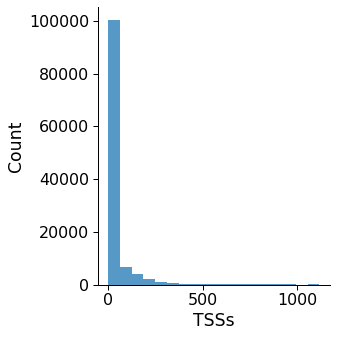

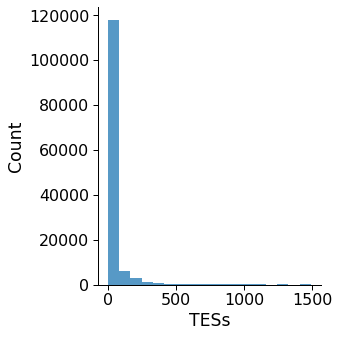

In [3]:
plot_region_widths(regions, 
                   kind='annot',
                   opref='figures/human')

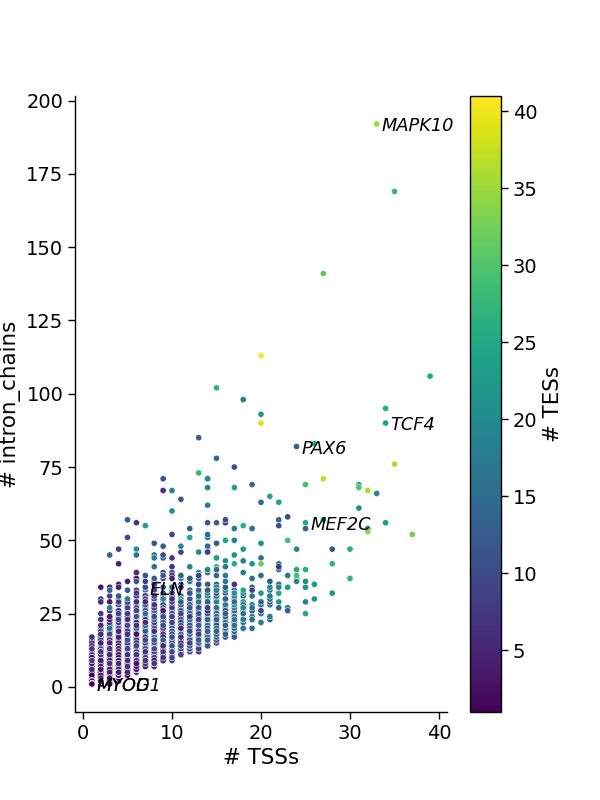

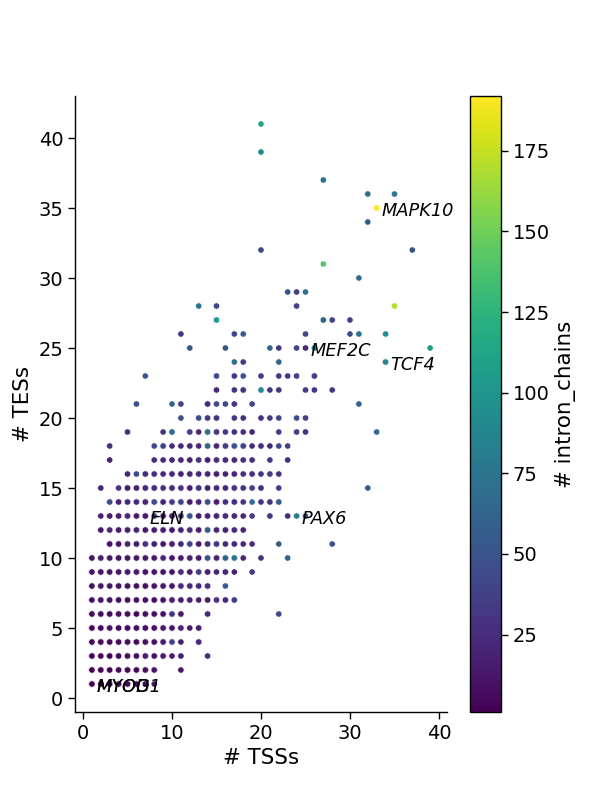

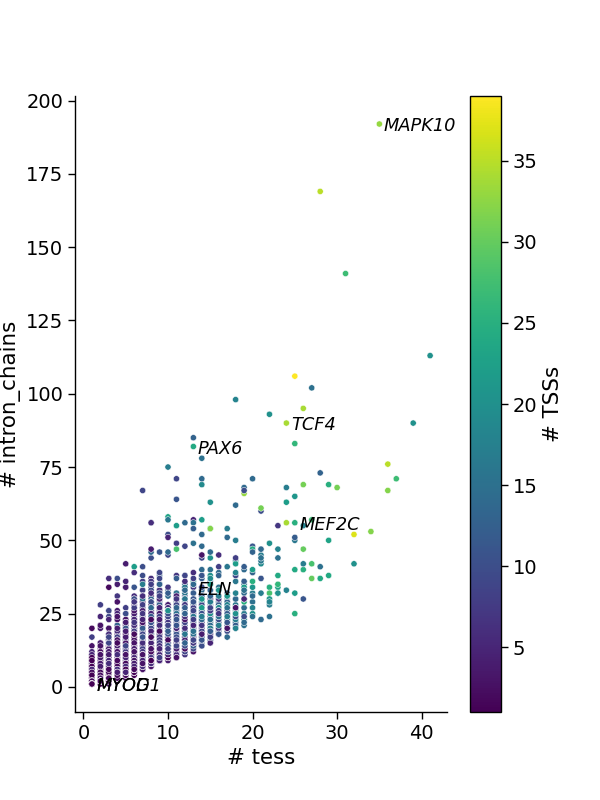

In [23]:
genes = ['PAX6', 'TCF4', 'MAPK10', 'ELN', 'MEF2C', 'MYOD1', 'MYOG']
plot_n_ic_tss_tes(counts, 
                  label_genes=genes,
                  kind='annot',
                  opref='figures/human')

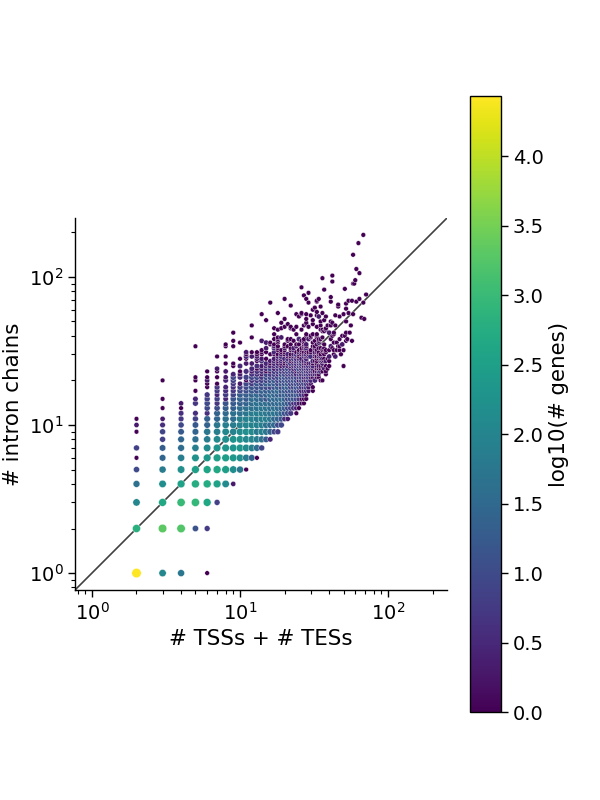

In [24]:
plot_genes_n_ic_ends(counts, 
                     kind='annot', 
                     opref='figures/human')

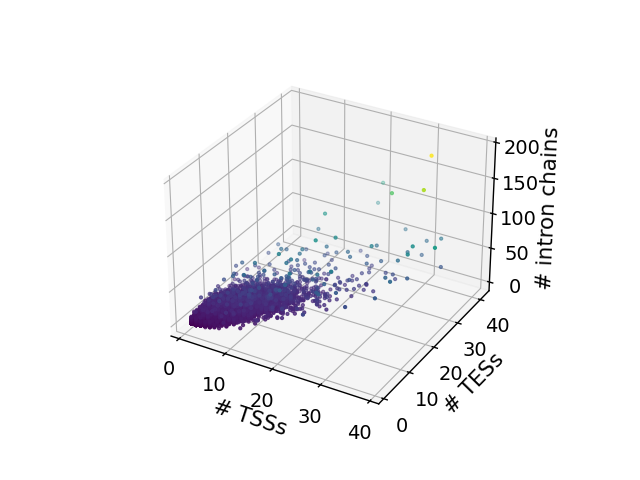

In [25]:
# label_genes = ['ELN', 'MAPK10']

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = counts['tss']
y = counts['tes']
z = counts['intron_chain']
c = counts['tss_ic_tes']

ax.set_xlabel('# TSSs')
ax.set_ylabel('# TESs')
ax.set_zlabel('# intron chains')

ax.scatter(x, y, z, c=c, s=5)
plt.show()

In [16]:
# fig = px.scatter_3d(counts, x='tss', y='intron_chain', z='tes', color='tss_ic_tes')
# fig.show()


## Properties of introns in gtf

In [6]:
gtf = pyranges.read_gtf('../../refs/gencode_v29_sirv4_ercc.gtf')
gtf.head()
temp = gtf.as_df()
temp.head()
temp.columns
introns = gtf.features.introns()
introns.lengths()
lens = introns.lengths()
gtf = gtf[gtf.gene_type == 'protein_coding']
introns = gtf.features.introns()
lens = introns.lengths()
ax = sns.displot(x=lens, kind='hist')
ax.set(xlim=(0,10000))
print(temp['len'].max())
temp.loc[temp['len'].idxmin()]
temp = temp.merge(sg.loc_df[['coord']], how='left', left_on='tss', right_index=True)
temp.loc[temp.gname=='ELN']